# Understanding Supervised Learning

_Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs_

![Image](../images/ml_map.jpg)

## Before we start:

- __Data exploration:__ 

Shape, Descriptive statistics (numeric, categorical, timestamp), Visualization, Domain knowledge 

- __Data transformations:__ 

Arbitrary, Modeling (joins, feature eng.), Performance (outliers, scaling, encoding)

![Image](https://media.giphy.com/media/ZThQqlxY5BXMc/giphy.gif)

In [3]:
# Imports
!pip install matplotlib

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/92/d0/fc5f6796a1956f5b9a33555611d01a3cec038f000c3d70ecb051b1631ac4/matplotlib-3.8.2-cp310-cp310-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e8/ea/f6e90933d82cc5aacf52f886a1c01f47f96eba99108ca2929c7b3ef45f82/contourpy-1.2.0-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/9a/52/1a5e1373afb78a040ea0c371ab8a79da121060a8e518968bb8f41457ca90/fonttools-4.47.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 1.1 MB/s eta 0:00:0000:0100:01
  Obtaining dependency 

In [4]:
# Read data

file = '../data/baseball_100_ok.csv'
data = pd.read_csv(file)
data.head()

,time,distance,speed
0,0.433895,18.39,42.383479
1,0.497875,18.39,36.936950
2,0.507734,18.39,36.219761
3,0.510163,18.39,36.047319
4,0.486942,18.39,37.766291


In [5]:
# Shape

data.shape

(100, 3)

In [6]:
# Descriptive statistics

data.describe()

,time,distance,speed
count,100.000000,1.000000e+02,100.000000
mean,0.470783,1.839000e+01,39.214015
std,0.028966,3.927673e-14,2.489707
min,0.412449,1.839000e+01,35.889372
25%,0.447718,1.839000e+01,36.968963
50%,0.474321,1.839000e+01,38.771293
75%,0.497444,1.839000e+01,41.074952
max,0.512408,1.839000e+01,44.587299


'../data/baseball_100_ok.csv'

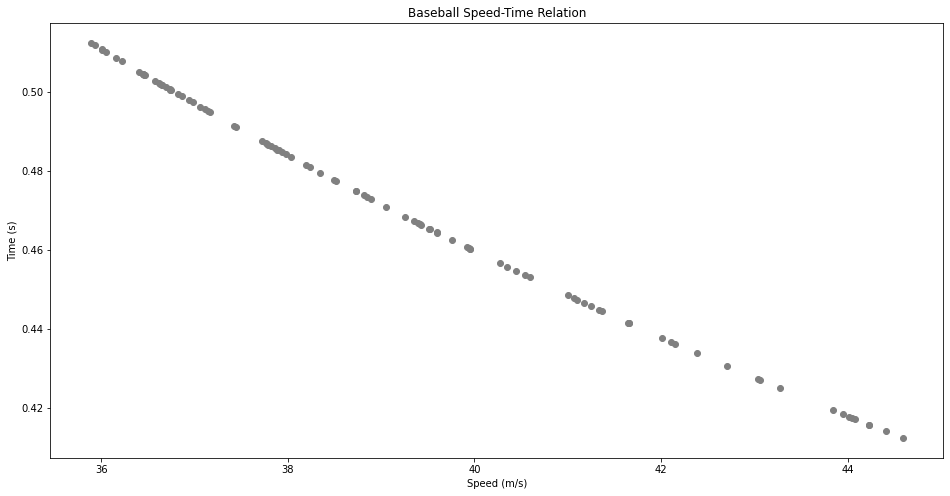

In [7]:
# Visualization

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))
ax.set(xlabel='Speed (m/s)', 
       ylabel='Time (s)',
       title='Baseball Speed-Time Relation')
ax.scatter(data['speed'], data['time'], c='grey')
file

### Domain knowledge

![Image](../images/velocity.png)

![Image](https://media.giphy.com/media/l0HlIJQUdby5FzlZe/giphy.gif)

In [8]:
# Features and predictions

X = data[['time','distance']]
y = data['speed']
print(X.shape,y.shape)

(100, 2) (100,)


In [9]:
X

,time,distance
0,0.433895,18.39
1,0.497875,18.39
2,0.507734,18.39
3,0.510163,18.39
4,0.486942,18.39
...,...,...
95,0.511837,18.39
96,0.418403,18.39
97,0.502807,18.39
98,0.499429,18.39


In [10]:
y

0     42.383479
1     36.936950
2     36.219761
3     36.047319
4     37.766291
        ...    
95    35.929413
96    43.952839
97    36.574705
98    36.822063
99    37.166345
Name: speed, Length: 100, dtype: float64

---

## Train-Test Split:

![Image](../images/train-test-split.jpg)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")
print(f"X_train: {type(X_train)}, X_test: {type(X_test)}, y_train: {type(y_train)}, y_test: {type(y_test)}")

X_train: (80, 2), X_test: (20, 2), y_train: (80,), y_test: (20,)
X_train: <class 'pandas.core.frame.DataFrame'>, X_test: <class 'pandas.core.frame.DataFrame'>, y_train: <class 'pandas.core.series.Series'>, y_test: <class 'pandas.core.series.Series'>


In [12]:
X_train.describe()

,time,distance
count,80.000000,8.000000e+01
mean,0.471361,1.839000e+01
std,0.029194,2.145077e-14
min,0.412449,1.839000e+01
25%,0.447718,1.839000e+01
50%,0.474321,1.839000e+01
75%,0.498132,1.839000e+01
max,0.512408,1.839000e+01


In [13]:
y_train.describe()

count    80.000000
mean     39.167592
std       2.504797
min      35.889372
25%      36.917947
50%      38.771293
75%      41.074952
max      44.587299
Name: speed, dtype: float64

In [14]:
X_test.describe()

,time,distance
count,20.000000,2.000000e+01
mean,0.468468,1.839000e+01
std,0.028658,7.290015e-15
min,0.417246,1.839000e+01
25%,0.452235,1.839000e+01
50%,0.470741,1.839000e+01
75%,0.489532,1.839000e+01
max,0.504591,1.839000e+01


In [15]:
y_test.describe()

count    20.000000
mean     39.399710
std       2.483172
min      36.445346
25%      37.569626
50%      39.069063
75%      40.672419
max      44.074688
Name: speed, dtype: float64

---

## Models

![Image](../images/models.png)

### _Linear Regression (test-in-training)_ 

In [16]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 381 µs, sys: 228 µs, total: 609 µs
Wall time: 557 µs


In [17]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 3.92 ms, sys: 5.17 ms, total: 9.09 ms
Wall time: 21.8 ms


In [18]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 2.04 ms, sys: 210 µs, total: 2.25 ms
Wall time: 2.16 ms


In [19]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.13416 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Linear Regression (the-real-stuff)_ 

In [20]:
%%time

# Model definition

model = LinearRegression()
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 258 µs, sys: 138 µs, total: 396 µs
Wall time: 310 µs


In [21]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.linear_model._base.LinearRegression'>
CPU times: user 2.81 ms, sys: 217 µs, total: 3.03 ms
Wall time: 3.06 ms


In [22]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 2.12 ms, sys: 152 µs, total: 2.27 ms
Wall time: 2.22 ms


In [23]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.13517 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [24]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is 1.01 times the tricky_error


---

### _Random Forest Regressor (test-in-training)_ 

In [25]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 170 µs, sys: 125 µs, total: 295 µs
Wall time: 272 µs


In [26]:
%%time

# Model training

weights = model.fit(X, y)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 144 ms, sys: 7.9 ms, total: 152 ms
Wall time: 161 ms


In [27]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 11 ms, sys: 2.59 ms, total: 13.6 ms
Wall time: 12.5 ms


In [28]:
# RMSE

tricky_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {tricky_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.02457 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


### _Random Forest Regressor (the-real-stuff)_ 

In [29]:
%%time

# Model definition

model = RandomForestRegressor()
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 135 µs, sys: 38 µs, total: 173 µs
Wall time: 149 µs


In [30]:
%%time

# Model training

weights = model.fit(X_train, y_train)
print(type(weights))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
CPU times: user 139 ms, sys: 7.54 ms, total: 146 ms
Wall time: 180 ms


In [31]:
%%time

# Model predictions

predictions = model.predict(X_test)
print(type(predictions))

<class 'numpy.ndarray'>
CPU times: user 11.9 ms, sys: 2.05 ms, total: 13.9 ms
Wall time: 14.4 ms


In [32]:
# RMSE

real_error = round(mean_squared_error(y_test, predictions)**0.5, 5)
print(f"Speed predictions error is: +/- {real_error} m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)")

Speed predictions error is: +/- 0.06033 m/s (Mean speed is around: 40 m/s and Std is around: 2 m/s)


In [33]:
# RMSE comparison

print(f"The real_error is {round(real_error/tricky_error, 2)} times the tricky_error")

The real_error is 2.46 times the tricky_error


---